In [78]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
#from bokeh.models import RangeId
from bokeh.palettes import Greens9
from bokeh.models import ColumnDataSource
import matplotlib.pyplot as plt

In [2]:
dir_name='C:/New_partition/Project_Simon_n_Schuster/'
df_m1=pd.read_csv(dir_name+'sample_data.csv')

In [3]:
df_m1.head()

,entity,formattype,fromdate,titlecount,titles,todate,author,amazontotalreviews,minappleprice,amazontotalrevenue,...,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher,barnesandnobledistributor,appledistributor
0,Alone in the dark,print,20170418,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170419,Frith Banbury,306.0,0,0,...,0,6,0,0,0,0,NaN,NaN,NaN,NaN
1,Alone in the dark,print,20170419,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170420,Frith Banbury,306.0,0,702,...,0,7,0,0,0,0,NaN,NaN,NaN,NaN
2,Alone in the dark,print,20170420,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170421,Frith Banbury,306.0,0,4914,...,0,7,0,0,0,0,NaN,NaN,NaN,NaN
3,Alone in the dark,print,20170421,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170422,Frith Banbury,306.0,0,4212,...,0,6,0,0,0,0,NaN,NaN,NaN,NaN
4,Alone in the dark,print,20170422,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170423,Frith Banbury,306.0,0,702,...,0,1,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df_m1.shape

(6539, 106)

29 columns are columns are found to be all zeros. These columns mostly contain preorder subscription revenue ane units of different brands. As these columns are not providing sufficient information they can be dropped. 

In [5]:
#df_m1

In [6]:
zero_cols = [ col for col, is_zero in ((df_m1 == 0).sum() == df_m1.shape[0]).items() if is_zero ]
df_m1.drop(zero_cols, axis=1, inplace=True)

In [7]:
df_m1.drop(columns=['titles'],inplace=True)

In [8]:
df_m1.shape

(6539, 76)

In [985]:
#for col in df_m1:
#    print(df_m1[col].unique())

In [986]:
#res = {col:df_m1[col].value_counts() for col in list(df_m1.columns.values) if col!='fromdate'and col!='todate'}

In [9]:
for col in df_m1:
    if col!='todate' and col!='fromdate':
        print(df_m1[col].value_counts() )
        print('\n')
    

The Walking Dead     3499
Alone in the dark    3040
Name: entity, dtype: int64


print    3310
ebook    1761
audio    1468
Name: formattype, dtype: int64


1    3600
2    2028
3     843
4      68
Name: titlecount, dtype: int64


Matthew Murdock    3499
Frith Banbury      3040
Name: author, dtype: int64


250.0    624
283.0    563
279.0    314
307.0    271
200.0    224
        ... 
137.0      1
265.0      1
209.0      1
189.0      1
216.0      1
Name: amazontotalreviews, Length: 151, dtype: int64


0      5761
999     778
Name: minappleprice, dtype: int64


0         915
719       117
3290      115
999       111
1998      102
         ... 
7025        1
82810       1
4988        1
119700      1
42957       1
Name: amazontotalrevenue, Length: 1826, dtype: int64


0     6437
6       11
9        9
3        9
5        7
1        6
8        5
2        5
10       4
15       4
17       4
14       3
22       3
12       3
46       3
82       2
20       2
33       2
11       2
13       2
7       

1.0    1531
Name: pricewassetbypublisher, dtype: int64


SIMON & SCHUSTER    1735
Name: barnesandnobledistributor, dtype: int64


SIMON AND SCHUSTER DIGITAL SALES INC     475
Simon and Schuster Digital Sales Inc.    281
Name: appledistributor, dtype: int64




In [10]:
#finding umique values 
uniqueValues = df_m1.nunique()

In [11]:
uniqueValues

entity                         2
formattype                     3
fromdate                     875
titlecount                     4
todate                       875
                            ... 
maxappleprice                  2
pagelength                     6
pricewassetbypublisher         1
barnesandnobledistributor      1
appledistributor               2
Length: 76, dtype: int64

In [12]:
#finding umique values with Nan
uniqueValues = df_m1.nunique(dropna=False)

In [13]:
uniqueValues

entity                         2
formattype                     3
fromdate                     875
titlecount                     4
todate                       875
                            ... 
maxappleprice                  2
pagelength                     7
pricewassetbypublisher         2
barnesandnobledistributor      2
appledistributor               3
Length: 76, dtype: int64

Since the output of uniqueValues when we consider is nan values is different. For exampel if we consider column 'appledistributor'
we can see without Nconsiderinbg nan uniquevalues is 2 but when we consider Nan values appledistributor is 3. So now find out 
the Nan values in dataframe

In [15]:
#Total number of nan values
df_m1.isnull().sum().sum()


19615

In [16]:
#number of nan values in each column
df_m1.isnull().sum()

entity                          0
formattype                      0
fromdate                        0
titlecount                      0
todate                          0
                             ... 
maxappleprice                   0
pagelength                   3981
pricewassetbypublisher       5008
barnesandnobledistributor    4804
appledistributor             5783
Length: 76, dtype: int64

As there are so many column let just find the columns that have missing values.

In [17]:
for column in df_m1:
    if df_m1[column].isnull().any():
       print('{0} has {1} null values'.format(column, df_m1[column].isnull().sum()))

amazontotalreviews has 17 null values
amazonaveragerating has 16 null values
amazoncategories has 5 null values
formats has 1 null values
pagelength has 3981 null values
pricewassetbypublisher has 5008 null values
barnesandnobledistributor has 4804 null values
appledistributor has 5783 null values


# Visualising missing data

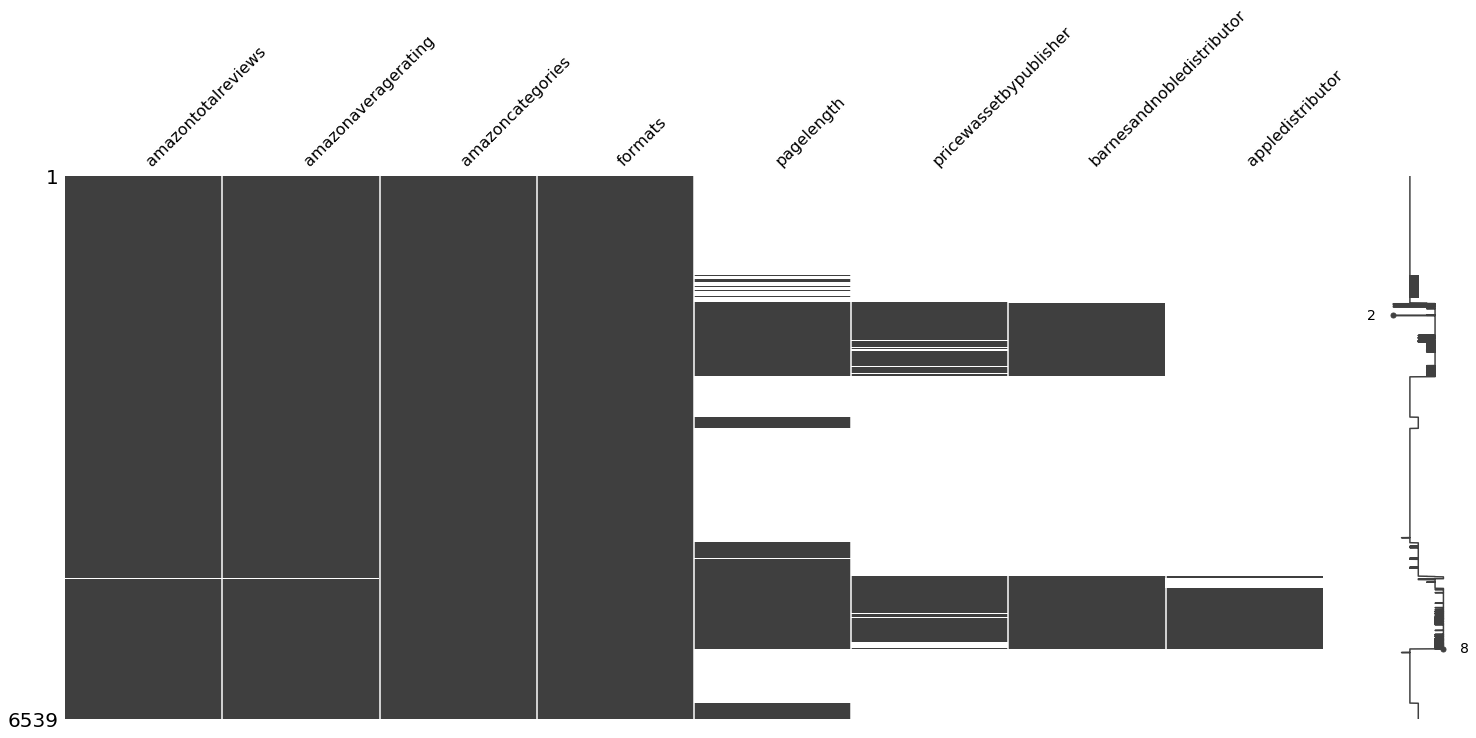

In [20]:
import missingno
missingdata_df = df_m1.columns[df_m1.isnull().any()].tolist()
missingno.matrix(df_m1[missingdata_df])

This graph shows us the patterns of missing values. Amazontotalreviews adn amazonaverage ratings have somehwat simialr pattern.

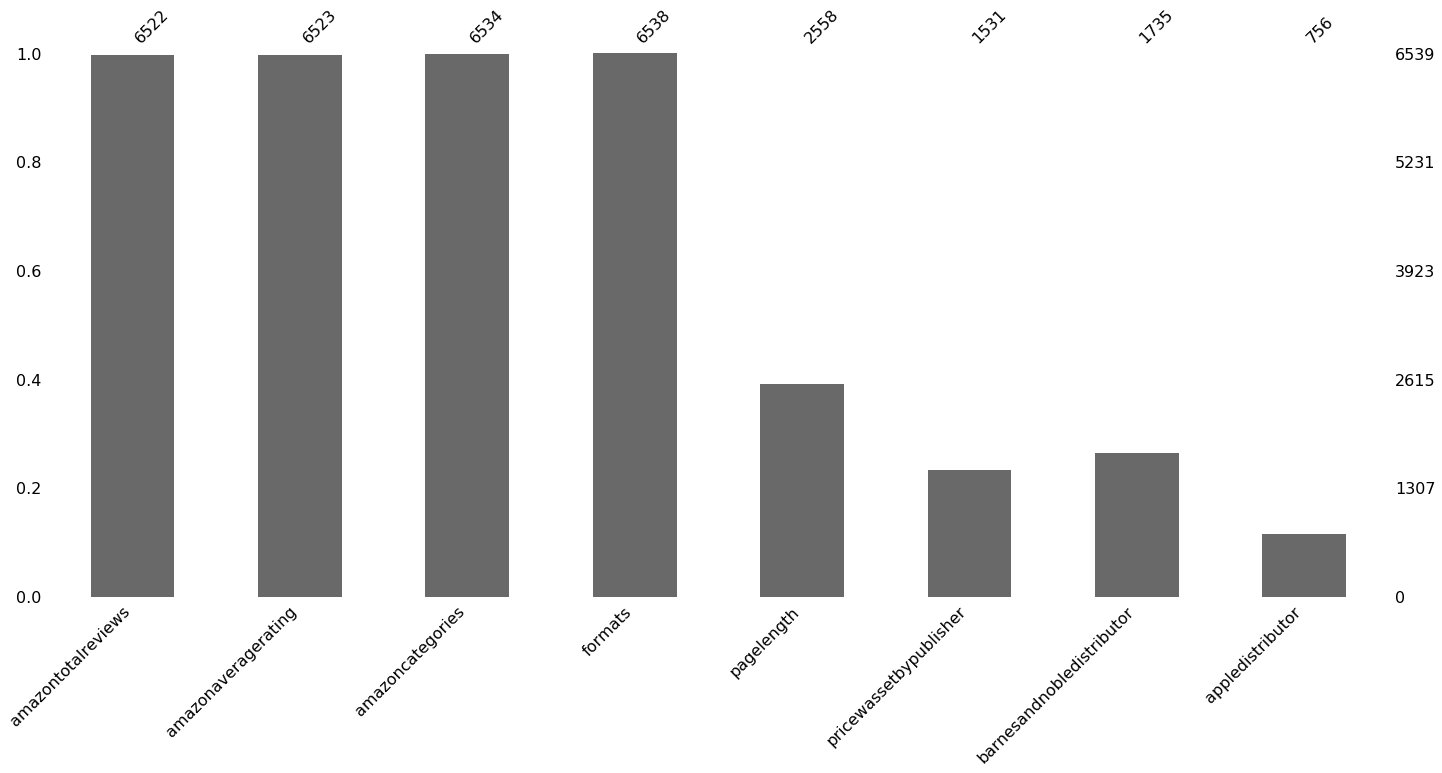

In [19]:
missingno.bar(df_m1[missingdata_df])

This plot shows the number of nan values in the columns. 'Appledistributor' contains the most missing values then 
'pricesetbypublisher' follwoed by 'barnesandnobledistributor' and so on. 

In [21]:
#missingno.heatmap(df_m1[missingdata_df]) 

For missing format I will find the most popular/commom format type and replace it with that. 

In [22]:
df_m1['formats'].value_counts().idxmax()

'Hardcover'

In [23]:
print(list(np.where(df_m1['formats'].isnull())[0]))
val=df_m1['formats'].value_counts().idxmax()

[5735]


In [24]:
#df_m1["formats"].replace("No College", inplace=) 
df_m1["formats"].fillna(df_m1['formats'].value_counts().idxmax(), inplace = True) 

In [25]:
print(list(np.where(df_m1["formats"].isnull())[0]))

[]


In [26]:
#print(list(np.where(df_m1['amazonaveragerating'].isnull())[0]))

In [27]:
#df_m1["amazonaveragerating"].fillna(df_m1['amazonaveragerating'].value_counts().idxmax(), inplace = True) 

In [28]:
df1=df_m1.iloc[:3040,:]
df2=df_m1.iloc[3040:,:]


I have divided the dataset because there are 2 differnt entities(books) we are dealing with and in order to fill missing values
I think it is better to deal with them separately. For column=amazonaveragerating I would fill with mean value. Also, for amazontotalreviews I will replace with mean value of entire column. 

In [29]:
for column in df1:
    if df1[column].isnull().any():
       print('{0} has {1} null values'.format(column, df1[column].isnull().sum()))

amazontotalreviews has 5 null values
amazonaveragerating has 5 null values
amazoncategories has 5 null values
pagelength has 1938 null values
pricewassetbypublisher has 2253 null values
barnesandnobledistributor has 2172 null values
appledistributor has 3040 null values


In [38]:
df1["amazonaveragerating"].fillna(df1['amazonaveragerating'].mean(), inplace = True) 
df2["amazonaveragerating"].fillna(df2['amazonaveragerating'].mean(), inplace = True) 

In [39]:
#print(list(np.where(df1['amazonaveragerating'].isnull())[0]))

In [40]:
#print(list(np.where(df2['amazonaveragerating'].isnull())[0]))

In [41]:
print(list(np.where(df1['amazontotalreviews'].isnull())[0]))

[]


In [42]:
df1["amazontotalreviews"].fillna(df1['amazontotalreviews'].mean(), inplace = True) 
df2["amazontotalreviews"].fillna(df2['amazontotalreviews'].mean(), inplace = True) 

In [43]:
#print(list(np.where(df1['amazontotalreviews'].isnull())[0]))

In [44]:
#print(list(np.where(df1['amazoncategories'].isnull())[0]))
df1["amazoncategories"].fillna(df1['amazoncategories'].value_counts().idxmax(), inplace = True) 

In [45]:
#print(list(np.where(df1['amazoncategories'].isnull())[0]))

Right now I am leaving other column. The reason is I might not need them. The remaining 4 columns are entirely nan for df1 which corresponds to entity/book 1. If I do I would use a similar technique to replace Nan values. 

In [46]:
#df1.fillna(0,inplace=True)
#df1.isnull().sum()

In [47]:
for column in df_m1:
    if df_m1[column].isnull().any():
       print('{0} has {1} null values'.format(column, df_m1[column].isnull().sum()))

pagelength has 3981 null values
pricewassetbypublisher has 5008 null values
barnesandnobledistributor has 4804 null values
appledistributor has 5783 null values


### Finding Time Series For Each Book

If I manually look at the dataframe I made the following observation:
    
1. They are two entities i.e two books.
2. Data is time series
3. data is repetitive.
4. Some columns even appear to be exactly same. For eg:
foundatamazon and bookscnareported and aaprereported and puttrackreported all seems equal. Simialry minamazonprice is equal to minlistprice


In [220]:
uniqueValues['entity']
df_m1['entity'].value_counts()

The Walking Dead     3499
Alone in the dark    3040
Name: entity, dtype: int64

In [219]:
uniqueValues['author']
df_m1['author'].value_counts()

Matthew Murdock    3499
Frith Banbury      3040
Name: author, dtype: int64

In [218]:
uniqueValues['formattype']
df_m1['formattype'].value_counts()

print    3310
ebook    1761
audio    1468
Name: formattype, dtype: int64

In [52]:
uniqueValues['publishertype']

2

In [53]:
uniqueValues['publisherparent']

3

In [55]:
 df_m1["fromdate"]=pd.to_datetime(df_m1["fromdate"], format="%Y%m%d")

In [56]:
df_m1['todate']=pd.to_datetime(df_m1['todate'], format="%Y%m%d")

In [202]:
#df_m1.head(3)

In [1032]:
#df_m1.groupby(["entity","formattype","formats","todate"])['totalrevenue'].sum().plot(legend=True)

In [61]:
df_m1.groupby(['entity','formattype','formats'])['totalrevenue'].count()

entity             formattype  formats                             
Alone in the dark  audio       Audible                                  19
                               Audible Audiobook                       299
                               Audible Book                             12
                               Audiobook                               291
                   ebook       Kindle Edition                           19
                               Kindle Edition,NOOK Book                863
                               NOOK Book                                 5
                   print       Audio CD                                789
                               Hardcover                               248
                               Mass Market Paperback                   477
                               Paperback                                18
The Walking Dead   audio       Audible                                  27
                               A

In [62]:
grouped=df_m1.groupby(['entity','formattype','todate'])['totalrevenue'].sum()

In [117]:
#grouped

In [97]:
TS_alone_in_the_dark_audio=grouped['Alone in the dark']['audio'].reset_index()
TS_alone_in_the_dark_print=grouped['Alone in the dark']['print'].reset_index()
TS_alone_in_the_dark_ebook=grouped['Alone in the dark']['ebook'].reset_index()
TS_The_Walking_Dead_audio=grouped['The Walking Dead']['audio'].reset_index()
TS_The_Walking_Dead_print=grouped['The Walking Dead']['print'].reset_index()
TS_The_Walking_Dead_ebook=grouped['The Walking Dead']['ebook'].reset_index()

In [199]:
ts_dict = {'TS_alone_in_the_dark_audio':TS_alone_in_the_dark_audio,
       'TS_alone_in_the_dark_print':TS_alone_in_the_dark_print,
       'TS_alone_in_the_dark_ebook':TS_alone_in_the_dark_ebook,
        'TS_The_Walking_Dead_audio': TS_The_Walking_Dead_audio,
       'TS_The_Walking_Dead_print': TS_The_Walking_Dead_print,
       'TS_The_Walking_Dead_ebook': TS_The_Walking_Dead_ebook
      }

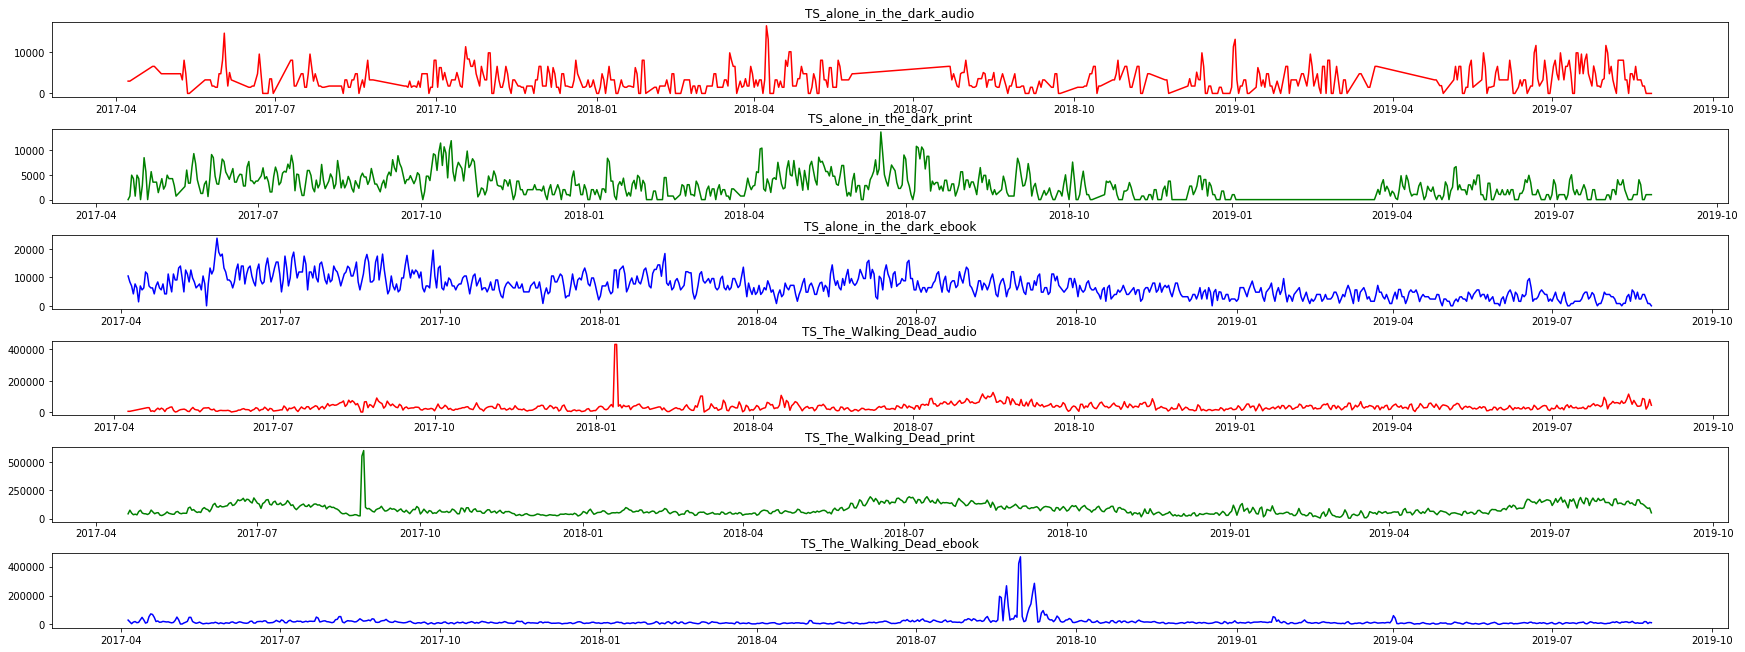

In [200]:
k=list(ts_dict.keys())
col=['red', 'green', 'blue','red', 'green', 'blue']
fig,axs = plt.subplots(6,1)
fig.tight_layout() 
plt.subplots_adjust()
list
for i in range(0,6):
    axs[i].plot(ts_dict[k[i]].todate, ts_dict[k[i]]['totalrevenue'], color=col[i])
    axs[i].set_title(k[i])


Above there 6 times serieswhich shows revenue from 2017-4 to 2019-10 of 2 books with different format type. I have observed 
the following from the time series. 
The highest revenue was earned between 2017-09 by "The WalkingDead print version"
Next highest revenue was earned by "The Walking ebook" version in 2018-10 and by "Walking Dead Audio" version 201-01.


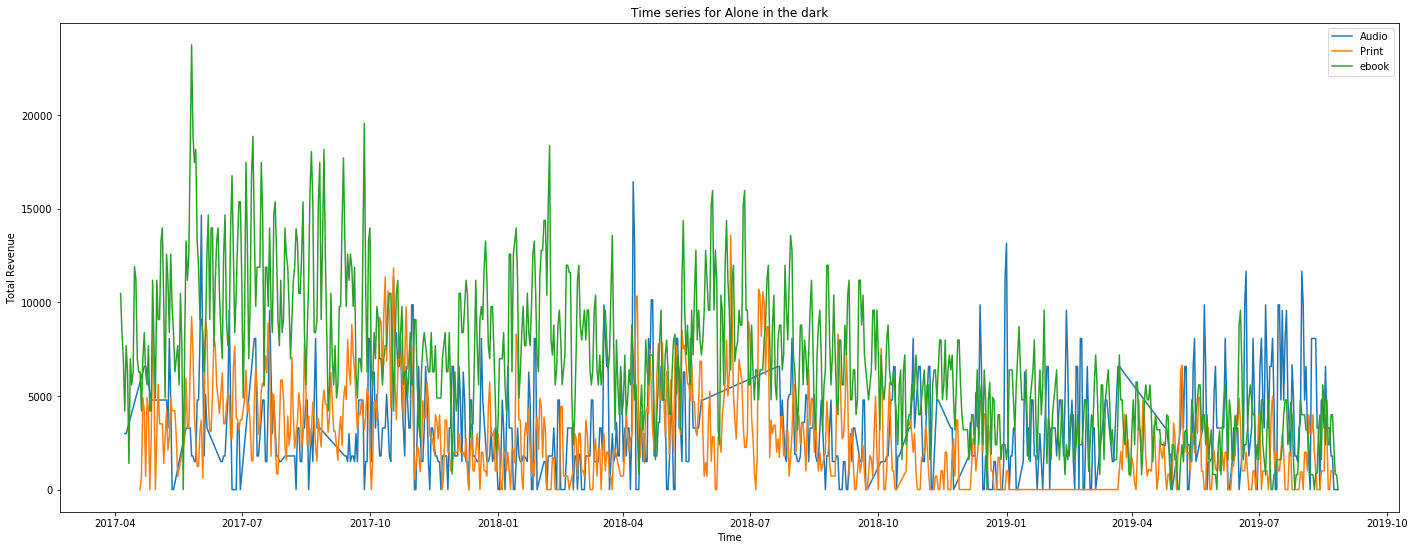

In [213]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 24                          
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.plot(TS_alone_in_the_dark_audio['todate'],TS_alone_in_the_dark_audio['totalrevenue'],label='Audio')
plt.plot(TS_alone_in_the_dark_print['todate'],TS_alone_in_the_dark_print['totalrevenue'], label='Print')
plt.plot(TS_alone_in_the_dark_ebook['todate'],TS_alone_in_the_dark_ebook['totalrevenue'], label='ebook')
plt.xlabel('Time')
plt.title('Time series for Alone in the dark')
plt.ylabel('Total Revenue')
plt.legend()

For "Alone in the dark" I can see 
1. Increase in revenue followed by decrease, then increase and later decrease in the ebook revenue.
2. Highest revenue earned is by ebook in between 2017-4 to 2017-07.
3. For the year 2017 ebook earned highest revenue.
4. In year 2019 it seems like Audio book generated higher revenue and then ebook and then print.

In [215]:
#def TS_plot(title,ts):
#    fig_size = plt.rcParams["figure.figsize"] 
#    fig_size[0] = 24                          
#    fig_size[1] = 9
#    plt.rcParams["figure.figsize"] = fig_size
#    plt.plot(ts['todate'],ts['totalrevenue'])
#    plt.xlabel('Time')
#    plt.title(title)
#    plt.ylabel('Total Revenue')


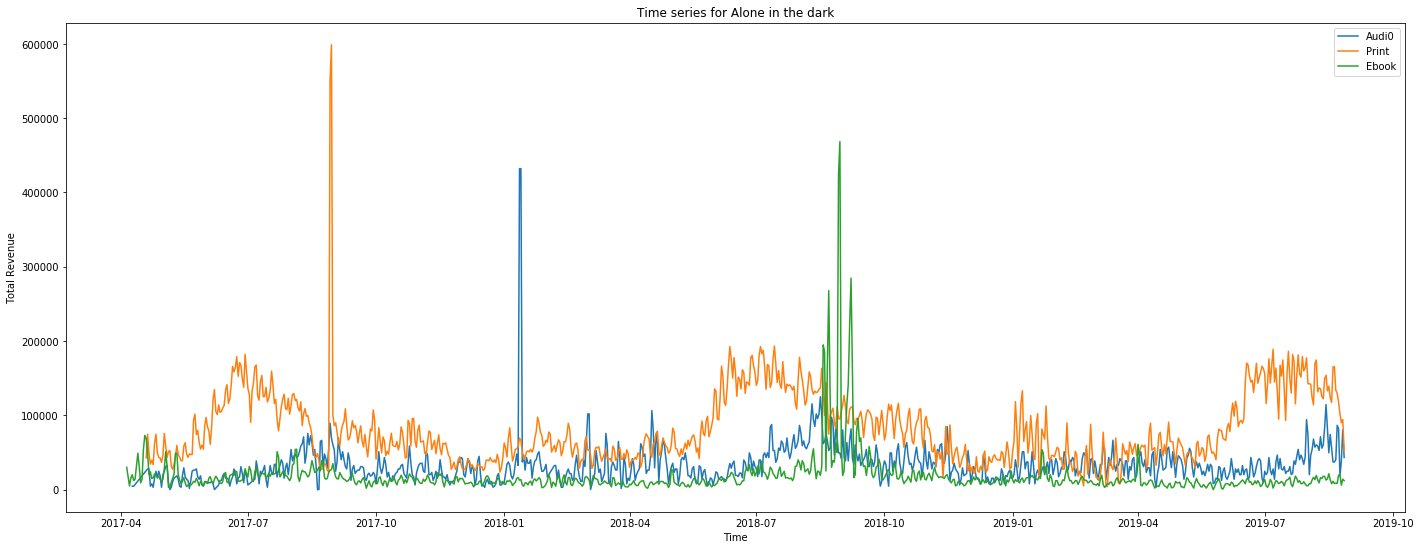

In [214]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 24                          
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.plot(TS_The_Walking_Dead_audio['todate'],TS_The_Walking_Dead_audio['totalrevenue'], label='Audi0')
plt.plot(TS_The_Walking_Dead_print['todate'],TS_The_Walking_Dead_print['totalrevenue'], label='Print')
plt.plot(TS_The_Walking_Dead_ebook['todate'],TS_The_Walking_Dead_ebook['totalrevenue'],label='Ebook')
plt.xlabel('Time')
plt.title('Time series for Alone in the dark')
plt.ylabel('Total Revenue')
plt.legend()

For The Walking Dead I have observed:
1. Highest Revenue for Print was generated aound 2017-09.
2. Highest Revenue for Audio was generated in 2018-01.
3. Highes Revenue for Ebook was generated in between 2018-8 to 2018-10.
4. In 2019 the popular version of book is found to be Print.

To analyse the revenue over the period of time I have plotted the time series analysis of each book with respect to its format 
type.

### Modelling